# Group 14 : Sandrine NEANG & Amina SIALI

# Lab Assignment 3 - Convolutional Neural Network

#### We will train a CNN model which can predict the presence of a glioma brain tumor through MRI images.

### I - Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

### II - Preprocessing of training and testing dataset

In [2]:
train_dir = r'C:/Users/sandr/OneDrive/Documents/Scolarité/ESILV/M1 A4/S8/Advanced Machine Learning/TDs/Lab Assignments/Lab Assignment 3 - CNN in Healthcare/brain_tumor_dataset/Training'
test_dir = r'C:/Users/sandr/OneDrive/Documents/Scolarité/ESILV/M1 A4/S8/Advanced Machine Learning/TDs/Lab Assignments/Lab Assignment 3 - CNN in Healthcare/brain_tumor_dataset/Testing'

train_paths = []
train_labels = []

for label in os.listdir(train_dir): 
    for image in os.listdir(train_dir+"/" +label): 
        train_paths.append(train_dir + '/'+label+ '/'+image) #we are adding the path of each MRI image in train_paths
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

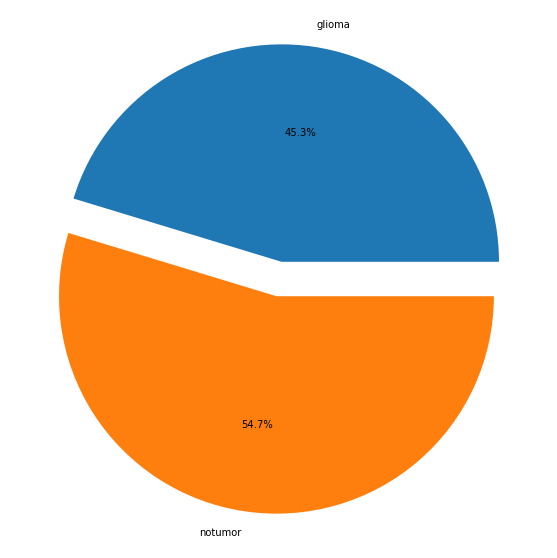

In [3]:
#Here a plot of the distribution of notumor and glioma images.
#45.3% of MRI images show a glioma brain tumor whereas 54.7% show no tumor.

plt.figure(figsize=(10,10))

plt.pie([len(os.listdir(train_dir+"/" +label)) 
        for label in os.listdir(train_dir)],
         labels=os.listdir(train_dir),
           explode = (0.08,0.08) 
           ,autopct='%1.1f%%')
plt.show()

In [4]:
#ImageDataGenerator is a method used to avoid overfitting (noise)

train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    "brain_tumor_dataset/Training/",
    target_size=(64,64),
    batch_size=32,
    class_mode="binary"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    "brain_tumor_dataset/Testing/",
    target_size=(64,64),
    batch_size=32,
    class_mode="binary"
)

Found 2916 images belonging to 2 classes.
Found 703 images belonging to 2 classes.


### III - Some display of the data

C:\Users\sandr\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


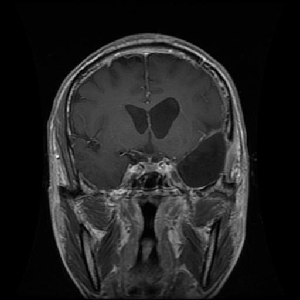

In [5]:
tf.keras.preprocessing.image.load_img(
    'brain_tumor_dataset/Training/glioma/Tr-gl_0011.jpg', grayscale=True, color_mode="grayscale", target_size=(300,300), interpolation="nearest"
)
#Here is a MRI image of someone who has a glioma tumor.

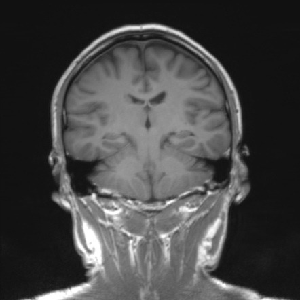

In [6]:
tf.keras.preprocessing.image.load_img(
    'brain_tumor_dataset/Training/notumor/Tr-no_0022.jpg', grayscale=True, color_mode="grayscale", target_size=(300,300), interpolation="nearest"
)
#Here is a MRI image of someone who has no tumor.

### IV - Building the CNN model

#### Initialising the CNN

In [7]:
CNN = Sequential()

#### Step 1 : Convolution

In [8]:
CNN.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#This is the first convolutional layer.

#We set the number of filter detectors to 32 of size 3x3.
#We will use the param input_shape=(64, 64, 3) this means we are expecting 3 channels because we have colored images of size 64x64 pixels.
#We apply the activation function "relu" to eliminate the non-linearity by removing the negative values.

#### Step 2 : Pooling

In [9]:
CNN.add(MaxPooling2D(pool_size=(2,2)))

#We set the size of the strides to 2x2
#The stride is a parameter that denotes the number of pixels the window moves by after each operation

#### Adding a second convolutional and pooling layer

These additional layers avoid overfitting and enable the CNN model to have better performance in image classification tasks.

In [10]:
CNN.add(Convolution2D(32,(3,3),activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2,2)))

#### Step 3 : Flattening

In [11]:
CNN.add(Flatten())

# Flatten() is used to convert the pooled feature maps into a flatten large feature vector.

#### Step 4 : Full connection

In [12]:
CNN.add(Dense(units=128,activation ="relu"))

#This layer aims to combine the features into atttributes that predicts the classes better.

#### Step 5 : Output layer

In [13]:
CNN.add(Dense(units=1,activation="sigmoid"))

#This is the final layer, we use the sigmoid activation function in order to predict a binary output.

In [24]:
CNN.summary()

#The summary provides a high-level overview of the architecture of the model, 
#including the layers, their output shapes, the number of trainable parameters, 
#and the total number of parameters in the model.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

### V - Training  the CNN model

#### Compiling the CNN model

In [14]:
CNN.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Training the CNN model on the training set and evaluating it on the testing set

In [15]:
model = CNN.fit(training_set,epochs=25,validation_data=test_set)
#We fit the model with the training set and test_set.

Epoch 1/25
92/92 [==============================] - 20s 203ms/step - loss: 0.2999 - accuracy: 0.8498 - val_loss: 0.2998 - val_accuracy: 0.8720
Epoch 2/25
92/92 [==============================] - 13s 144ms/step - loss: 0.1175 - accuracy: 0.9575 - val_loss: 0.1616 - val_accuracy: 0.9360
Epoch 3/25
92/92 [==============================] - 13s 141ms/step - loss: 0.1005 - accuracy: 0.9602 - val_loss: 0.1829 - val_accuracy: 0.9317
Epoch 4/25
92/92 [==============================] - 14s 151ms/step - loss: 0.0751 - accuracy: 0.9729 - val_loss: 0.2181 - val_accuracy: 0.9118
Epoch 5/25
92/92 [==============================] - 14s 155ms/step - loss: 0.0930 - accuracy: 0.9657 - val_loss: 0.3543 - val_accuracy: 0.8677
Epoch 6/25
92/92 [==============================] - 14s 154ms/step - loss: 0.0578 - accuracy: 0.9818 - val_loss: 0.1602 - val_accuracy: 0.9331
Epoch 7/25
92/92 [==============================] - 15s 161ms/step - loss: 0.0664 - accuracy: 0.9767 - val_loss: 0.3049 - val_accuracy: 0.8919

In [16]:
CNN.evaluate(test_set)

#The accuracy and the loss are almost perfect for this CNN model.
#We can now predict either the person has a glioma tumor or not.

22/22 [==============================] - 1s 63ms/step - loss: 0.2494 - accuracy: 0.9189


[0.2494012415409088, 0.9189189076423645]

### VI - Prediction

In [17]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

test_image = load_img('predictions/notumor_Te-no_0010.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#We took a random MRI image to see if the person has a glioma tumor or not. 
#If the person does not have a glioma tumor, the prediction print a 1.0. 
#If the prediction is not equal to 1.0, the person has a glioma tumor.

print(training_set.class_indices) #to check which label corresponds to 0 & which another label corresponds to 1

result = CNN.predict(test_image)
if result[0][0] == 1:
  prediction = 'notumor'
else:
  prediction = 'glioma'
print(prediction)

#Here, the CNN model predicted that the test_image do not correspond to a glioma tumor.

{'glioma': 0, 'notumor': 1}
1/1 [==============================] - 0s 97ms/step
notumor


In [23]:
test_image = load_img('predictions/glioma_Te-gl_0010.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = CNN.predict(test_image)
if result[0][0] == 1:
  prediction = 'notumor'
else:
  prediction = 'glioma'
print(prediction)

#Here, the CNN model made a mistake on predicting that this image has no tumor whereas it has a glioma tumor.

1/1 [==============================] - 0s 24ms/step
notumor


In [18]:
#Here we used the CNN model to predict the test_set.

predictions = CNN.predict(test_set)

print(predictions)

22/22 [==============================] - 2s 65ms/step
[[1.00000000e+00]
 [9.88683105e-01]
 [9.99986887e-01]
 [1.00000000e+00]
 [1.11334883e-02]
 [9.85073984e-01]
 [4.99745039e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.37208277e-02]
 [5.99729887e-04]
 [3.25030684e-02]
 [1.73214485e-03]
 [1.00000000e+00]
 [9.11248207e-01]
 [1.55499531e-03]
 [1.00000000e+00]
 [3.21072293e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [5.14470972e-03]
 [7.71449730e-02]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.49350429e-01]
 [8.06483149e-04]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.55786614e-04]
 [4.51382744e-04]
 [1.23542640e-02]
 [3.03273425e-02]
 [4.33774618e-03]
 [1.00000000e+00]
 [1.45948172e-01]
 [6.02093339e-03]
 [9.62120888e-04]
 [1.00000000e+00]
 [7.43992686e-01]
 [1.00000000e+00]
 [3.41552513e-04]
 [1.00000000e+00]
 [2.16249004e-02]
 [3.22992477e-04]
 [2.28763907e-03]
 [1.00000000e+00]
 [1.20157108e-01]
 [8.22981715e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.53335603e-02]
 [1.000000

In [19]:
print(test_set.class_indices) #to check which label corresponds to 0 & which another label corresponds to 1

{'glioma': 0, 'notumor': 1}


In [20]:
for i in range(604):
    if predictions[i] == 1:
        print("no tumor")
    else:
        print("glioma")

no tumor
glioma
glioma
no tumor
glioma
glioma
glioma
no tumor
no tumor
glioma
glioma
glioma
glioma
no tumor
glioma
glioma
no tumor
glioma
no tumor
no tumor
no tumor
glioma
glioma
no tumor
no tumor
glioma
glioma
no tumor
no tumor
glioma
glioma
glioma
glioma
glioma
no tumor
glioma
glioma
glioma
no tumor
glioma
no tumor
glioma
no tumor
glioma
glioma
glioma
no tumor
glioma
glioma
no tumor
no tumor
glioma
no tumor
glioma
glioma
glioma
no tumor
no tumor
no tumor
glioma
no tumor
glioma
glioma
no tumor
no tumor
no tumor
no tumor
no tumor
no tumor
glioma
glioma
glioma
no tumor
glioma
no tumor
no tumor
no tumor
no tumor
glioma
no tumor
glioma
no tumor
glioma
glioma
no tumor
no tumor
glioma
no tumor
glioma
no tumor
glioma
no tumor
glioma
glioma
glioma
glioma
no tumor
no tumor
no tumor
glioma
glioma
glioma
glioma
no tumor
no tumor
no tumor
no tumor
glioma
no tumor
glioma
no tumor
glioma
no tumor
glioma
no tumor
glioma
no tumor
glioma
no tumor
no tumor
no tumor
no tumor
no tumor
no tumor
glioma
no 

### VII - Evaluation of the performance of the CNN model

#### Display of the accuracy and the loss
The two plot below shows that our CNN model has a high accuracy (almost 1.0) and does not have much loss.

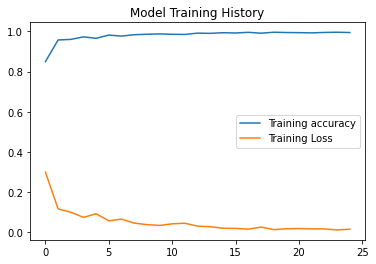

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

#Display of the training accuracy and training loss (training_set)

acc = model.history['accuracy']
loss = model.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.title('Model Training History')
plt.legend(loc=0)
plt.figure()

plt.show()

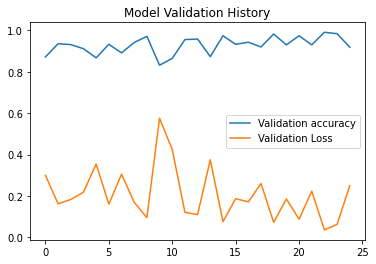

<Figure size 432x288 with 0 Axes>

In [22]:
#Display of the validation accuracy and validation loss (test_set)

val_acc = model.history['val_accuracy']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, val_acc, label='Validation accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Validation History')
plt.legend(loc=0)
plt.figure()

plt.show()

#This plot is not that perfect as the previous one, but it explains false prediction that we had before.